# Setting up the Hamiltonian



<br>

Using the canonical anticommutation relations $\lbrace c_i^\dagger,c_j\rbrace = \delta_{ij}$ and $\lbrace c_i,c_j\rbrace = \lbrace c_i^\dagger,c_j^\dagger\rbrace = 0$, the Hamiltonian of the open Kitaev chain in real space can be re-written as follows:

<br>

$\begin{align}
\mathcal{H} &= -\mu\sum_{j=1}^N c_j^\dagger c_j - t \sum_{j=1}^{N-1} (c_j^\dagger c_{j+1} + \text{h.c.}) + \Delta \sum_{j=1}^{N-1} (c_j c_{j+1} + \text{h.c.})\\\\
&= -\frac{1}{2}\mu\sum_{j=1}^N(c_j^\dagger c_j - c_j c_j^\dagger) - \frac{1}{2} t \sum_{j=1}^{N-1} (c_j^\dagger c_{j+1} - c_{j+1}c_j^\dagger + \text{h.c.}) + \frac{1}{2} \Delta \sum_{j=1}^{N-1} (c_j c_{j+1} - c_{j+1}c_j + \text{h.c.}) + \text{const.} \\\\
&\equiv \frac{1}{2}\Psi^\dagger H_{\text{BdG}} \Psi
\end{align}$

<br>

with $\Psi = \begin{pmatrix}
c_1 \\
c_1^\dagger \\
\vdots \\
c_N \\
c_N^\dagger
\end{pmatrix}$ and $H_{\text{BdG}} = \begin{pmatrix}
-\mu & 0 & -t & \Delta & 0 & \cdots & 0 & 0 & 0 \\
0 & \mu & -\Delta & t & 0 & \cdots & 0 & 0 & 0 \\
-t & -\Delta & -\mu & 0 & -t & \cdots & 0 & 0 & 0 \\
\Delta & t & 0 & \mu & -\Delta & \cdots & 0 & 0 & 0 \\
0 & 0 & -t & -\Delta & -\mu & \cdots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 0 & 0 & \cdots & \mu & -\Delta & t \\
0 & 0 & 0 & 0 & 0 & \cdots & -\Delta & -\mu & 0 \\
0 & 0 & 0 & 0 & 0 & \cdots & t & 0 & \mu \\
\end{pmatrix}$ being a $2N \times 2N$ matrix.

<br>

This matrix is sparse (in fact pentadiagonal) and can easily be diagonalized numerically which is done in the following.

In [1]:
function Hamiltonian(N,Δ,t,μ)
    L = 2*N
    H = zeros(L,L)
    for i in 1:L-2
        H[i,i+2] = (-1)^i * t        
    end
    for i in 1:(N-1)
        H[Int64(2*(i-1)+3),Int64(2*(i-1)+2)] = Δ
        H[Int64(2*(i-1)+4),Int64(2*(i-1)+1)] = -Δ
    end        
    H = H + transpose(H)    
    for i in 1:L
        H[i,i] = (-1)^i * μ
    end
    return H
end

Hamiltonian (generic function with 1 method)

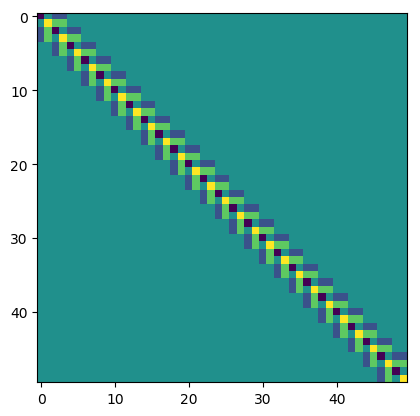

PyObject <matplotlib.image.AxesImage object at 0x000000001FDF1160>

In [2]:
N = 25
Δ = 1.
t = 1.
μ = 2.

H = Hamiltonian(N,Δ,t,μ)

using PyPlot
imshow(H)

# Plotting the energy spectrum as a function of $\mu$ with $\Delta = t \neq 0$

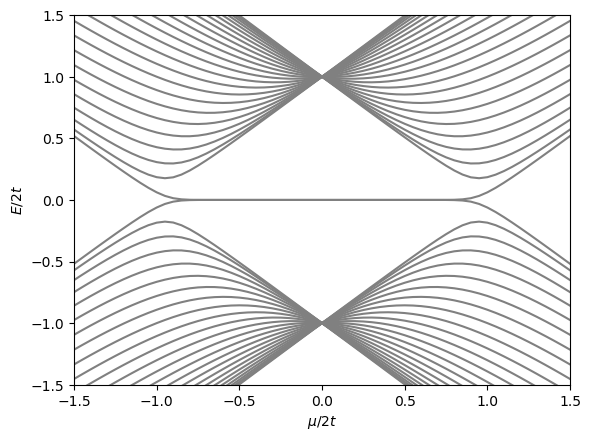

In [3]:
μ_vals = collect(-3:0.1:3.0)
spectra = zeros(2N, length(μ_vals))
for (i,μ) in enumerate(μ_vals)
    H = Hamiltonian(N,Δ,t,μ)
    spectra[:,i] = eigvals(H)
end
for i in 1:2N
    plot(μ_vals/2,spectra[i,:]/2,color="grey")
end
xlabel(L"\mu/2t")
ylabel(L"E/2t")
xlim(-1.5,1.5)
ylim(-1.5,1.5);

# Plotting the square of the absolute value of the wave function for the state corresponding to the Majorana modes for different values of $\mu$

In [4]:
function wavefunction(μ)
    H = Hamiltonian(N,Δ,t,μ)
    a1 = eigvecs(H)[:,N]
    a2 = eigvecs(H)[:,N+1]
    x = zeros(N)
    for i in 1:N
        x[i] = a1[(i-1)*2+1]^2 + a1[(i-1)*2+2]^2 + a2[(i-1)*2+1]^2 + a2[(i-1)*2+2]^2
    end
    return x
end

wavefunction (generic function with 1 method)

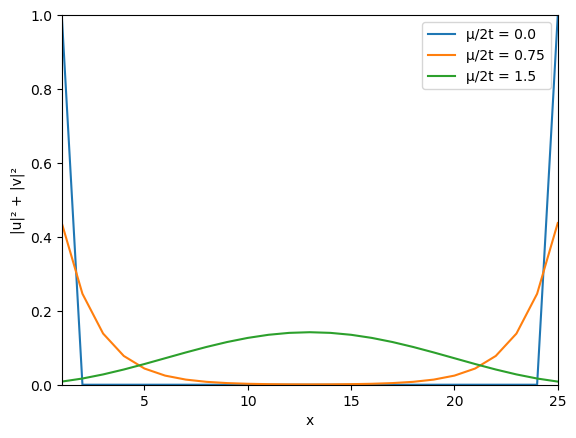

In [5]:
μ_vals = [0.0,1.5,3.]
for μ in μ_vals
    plot(collect(1:N),wavefunction(μ), label="μ/2t = $(μ/2)")
end
legend()
xlabel("x")
ylabel("|u|² + |v|²")
ylim(0,1)
xlim(1,N);

### Below you find this as an animation

In [6]:
using PyCall
@pyimport matplotlib.animation as anim

function showmp4(filename)
    open(filename) do f
        base64_video = base64encode(f)
        display("text/html", """<video controls src="data:video/x-m4v;base64,$base64_video">""")
    end
end
fig = figure(figsize=(10,5))
ax = axes()
μ_vals = collect(-3:0.1:3.0)
function plotw(μ)
    clf()
    suptitle("\$μ/2t = $(μ/2) \$")
    subplot(121)
    xlim(1,N)
    ylim(0,1)
    xlabel("x")
    ylabel("|u|² + |v|²")    
    plot(collect(1:N),wavefunction(μ))
    plot()
    subplot(122)
    for i in 1:2N
        plot(μ_vals/2,spectra[i,:]/2,color="grey")
    end
    axvline(μ/2,color="darkred")
    xlim(-1.5,1.5)
    ylim(-1.5,1.5)
    xlabel(L"\mu/2t")
    ylabel(L"E/2t")   
    plot()
end
n = 50
l = 3
interval = 100
function animate(k)
    plotw(k/n)
end
function init()
    plotw(0)
end
withfig(fig) do
    global myanim = anim.FuncAnimation(fig, animate, frames=l*n+1, init_func=init, interval=interval, blit=true)
    myanim[:save]("kitaev_chain_anim.mp4", bitrate=-1, extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])
end
showmp4("kitaev_chain_anim.mp4")

<video controls src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQACHTdtZGF0AAACrgYF//+q3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjYzOCA3NTk5MjEwIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAACkQWWIhAAQ//73gb8yy18iuslx+ed9LKzPPOQ8cl2JrrjQAAADAAVVfgnDjqAL6CpwkWPo64vQhSx7fgMGRk2QZxKmn9Q+hQovpJBTUWaDwu1hHaDDReq77uwHblj66s6yB+OPc0YejUKXqmNzegj9xJhKwAJ9BsifZtzhVoURM4+Aj27xZg6Meh/dwjsUwjGOwflyepTSTVE3AT5LB5dSwnxw7GTkoWCvC/ooKtYBHFbci9qirMXbpNMOMhFa1FN4FdxGLuiBXaPJ/aiX5T5WZiMu7lC1bH01cEbgAAADAKBJEgiAAKuKnm4D5JW6Gs37EzOrbX4SC0VXrb93IcjB2Tla7+5wRjJHcvoy5tSvAo9ajGIkgBsckEOgUQ3SrTggtueXlde3wqR08qZiwquoT5Lgk/dfz9XHHIn3yra+bMwOkuQv5qBtVIGfWrGWeKtYzZ72Z2U5Dp2LGWGdpgonrVi4Fg5QA4uJhX27FZPY8lMyvhvSaifXiNmovMUhnbCI5oKzSC0xUBHV/W07yJicHQ4hNCkWJmezSDLbxPvnt/HWNWqHir42t4UGlgbXXxlcN8FHYmKKh9YGSEjSrG3Q6n5Y5rQgIt42Vkx7vVpJ6PZTi4lZlIFffGpuG0bF2nU812bHzPSAFQW/nGq9dTad0P4LhU6qWEGjxPstxX20H2WmQ4kxIP0WZHDK1g+ck7nhOrpjF7bgPu1Nar2uxN9WamITxpdCsp4vbRiKN8wAAvKDnxAILpm0IsYOdf+CwCHO6aoWSs5YwgLGxuaS2vFy/qr65Uv8ILnd39PnAIkzr4hlzGd4G/CcmhjdCgaaA0aMltaqTrb9DRDOg+0t3i0Y5CrrXrIPwMwRqYU9bXvC7w/X5u9TOI5k3fARoUjY0L6/zw8Q48zu20ofexIw9uedwU4e0kE86Jd8my0042Lgg9NYBlhN6UAATVe+7gdX3qA//CkZFEGhLMrRWSYeoeghGsCI1oWFZWE5EVJWnJTMt4nMg0+AeaDLZ2Tn0bs147c3pm8FxW64u5HrNlWP0oGxhJfHTgywJuk2eqNJG+eJ+G8+7+GvPpJvTYJbCdMZDEUqjpdXFQcQDF8BY7LB3KbDOpYDfu0znb7PkFz6wvo24iDrYJsjmY3rPbrbmDfdCZsEqF9G0s47YjuWfrRvQ0V4fLyaH44rAMV/+re8NFSBFeQxxC5mHORIEmg0Pf87CiQ+JHfuVNf1swFH71GTiCTbPodzLNnk3neJ8hmMZzj7kSstbcNfImYpyy/+lDnkacErOnqceww5f3jctz8W5tEoOLUJ4gLkoec9RPK8Ob5DX2P9yOz1N7EohYDV192uOzjhaqTCUQJPYXHkjASlxVPpHk1W6Vs3u50Cg8a48te37C81/Zjv7+9CeO4o98IgpITQY0hfv7ahPIO0m8ryq1BDOjie8fFjoBQnv+A4aMRiZLb78tKrR1seHkT/cx25Dhdk7rYV+xv9KPO0OSFPGWPVpRUUhsd49GVqj3Rt1H3L5MVdCVaOHZoEMY2FxWzIHLUCbC7XSwVcdFhs/If896z0jRRooA1UbTu3XEwYPM/QdiJG52ux2VceIf9VT/PHT/5B0fDFM8OVSFHk+TL+BEzEKtDd9Ub386l77m3+f/+ofkuh6Vyo5mqWFLozFXuioSQ/2P5WrOqLcit36Rrnf6I3Lvr54xSP3gIQ5bs+Ol17aFVWJiWIRItI0PsB0PfPrF7vBcXVmscv1bHR8N81+qeRRJI4C9oB0lQmPJqkTY3d5RyFfKdGwW8DSfJmN9hT/eS9397tf/Amq5EmXvqyzdNGJQzaPtvAihXDQ2qW6F6C87coUlENymWhcs3W8Fnd0qacuk+DvOS32l/pQfF7uLpfKNvBmyQf65GJWt8Ft5TGlElVdsf2Fi8Wr4SHV+geRbtefkVqZcZx7jXdP1IpxtV66qg5dyeyyUXtg7KEO6nkshiJJJLbLLHZANEAsB1DzW9sjHgWfwgFbtboQgB1c8ewZ/gi/bepXi++IfV3P2DCP9FcFw479Fz6O9ihnHPTEUuMnO+FM0jjFbNpZsj7LKx53nce5ZwrgR0pmli2nk49X//J3YfIVYVRJs+xWI1ApXHCxpJXfPUKwQs+SzwF07XS+zs/IoZJYOEVcy0QoAAA6D3sojyF4PEbxYE0SBUWmNkhz9eotPNY1gtT/eC507XJ+QM/Fh26WZzwDN23iQNOcW8mMn8tVP1YtBARLsaYhemaBgVR7fMzGVMUKb5M+v3nKvSxRvWX1hwY35wQDyoGHyzemKCTXIoZDXpL2EpXYiv6oYWMzE/4N1Ctn/WswVKEKc1kVVF//BOPvxfVotXEyTDv31TmGlplrlNth9mbemxl6t69P37j1LVEIkMNMSiLS2L/UAfBEXon+raII4x2FVOcJG3c+gI2fWOstNv/pPJkVLP45cSSw2f/qbI1szNrUfiaHYef7PoENME4CVtf7lLJkcJw5efhBSMr3dBQXJeJgJXh+99UGNjJ2aTHxZR0Cv67YA+eCNQ5/WSS3Ei7G0cdMzHXetH54SywaMjb32Cb1LH+rGHFdEy+wiIToScGgT2+WH/b9rMSXjaiZaCFkNqOAJqqdJLI2hUD8Gdodo9+r78IUt+MFOPnJ+ZKc8z/RUBCzm4J1+QCOVrZES1v2XRFtNH2YXkwOMJo3kZ2S/Q1bVGad5bPL5OtO3XQvySXhm7bX/op7zR+7g9YEd5r7AyvT7i2jpRsOCYsJAgp3njCloukEfdqucQ0vmnGABDRWsm9HyK1XO8JWoBlIUeaVqBZbVuFjRf56cpV2tfjLbhDPeZONYqscZM54id67S5A+yfVkzQRX7vI/0XyIGabAq0YTSkVX1dmPo2hRQ/z89RVAnQpvMOi4WZCmaLTjw8vN9o8XuZk7jBVa/DOCilPvCwSA2koTojMUAx2A4Lufetb4RXEkjhGnH3VzrCuFkWtXI7

We see that the Majorana zero modes not only exist for $\mu = 0$, but persist until $\mu \simeq 2t$. In fact, the bulk gap of originally $2t$ at $\mu = 0$ narrows for increasing $\mu$ and the zero modes are protected by symmetry as long as the bulk gap is finite (the Hamiltonian obeys particle-hole symmetry and the spectrum has therefore to be symmetric around $E=0$). As implied by the square of the absolute value of the corresponding wavefunction, the Majorana zero modes are fully localized at the opposite ends of the chain for $\mu = 0$. For increasing $\mu$ the wavefunction decays exponentially into the bulk of the chain.